In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/LGgram_backup/AI Humanities/21_23피해이륜차종.csv', encoding='utf-8')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


사고번호             사고일시   요일             시군구  사고내용  사망자수  중상자수  \
0  2021010100100015  2021년 1월 1일 01시  금요일   서울특별시 강북구 미아동  경상사고     0     0   
1  2021010100100060  2021년 1월 1일 11시  금요일   서울특별시 중랑구 중화동  중상사고     0     1   
2  2021010100100098  2021년 1월 1일 14시  금요일   서울특별시 금천구 독산동  중상사고     0     1   
3  2021010100100181  2021년 1월 1일 19시  금요일  서울특별시 동대문구 전농동  경상사고     0     0   
4  2021010100100182  2021년 1월 1일 19시  금요일   서울특별시 광진구 화양동  경상사고     0     0   

   경상자수  부상신고자수        사고유형  ... 기상상태        도로형태 가해운전자 차종 가해운전자 성별 가해운전자 연령  \
0     1       0    차대차 - 기타  ...   맑음    단일로 - 기타       승용        남      57세   
1     0       0    차대차 - 기타  ...   맑음  교차로 - 교차로안       화물        남      67세   
2     0       0  차대차 - 측면충돌  ...   맑음  교차로 - 교차로안       승용        남      28세   
3     1       1    차대차 - 기타  ...   맑음    단일로 - 기타       승용        남      59세   
4     1       0    차대차 - 추돌  ...   맑음    단일로 - 기타       승용        남      58세   

  가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  
0       상해없음       이륜        남      26세         경상  
1       상해없음       이륜        남      60세         중상  
2       상해없음       이륜        남      50세         중상  
3         경상       이륜        남      22세       부상신고  
4       상해없음       이륜        남      23세         경상  

[5 rows x 22 columns]

# 데이터 전처리

In [87]:
df.isnull().sum() #결측치 없음

사고번호          0
사고일시          0
요일            0
시군구           0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
dtype: int64

In [88]:
df.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [89]:
df['시군구'].value_counts()

시군구
서울특별시 강남구 역삼동    506
서울특별시 관악구 신림동    452
서울특별시 관악구 봉천동    380
서울특별시 강남구 논현동    339
서울특별시 중랑구 면목동    321
                ... 
서울특별시 중구 주자동       1
서울특별시 중구 저동1가      1
서울특별시 중구 주교동       1
서울특별시 마포구 구수동      1
서울특별시 마포구 하중동      1
Name: count, Length: 426, dtype: int64

<Axes: >

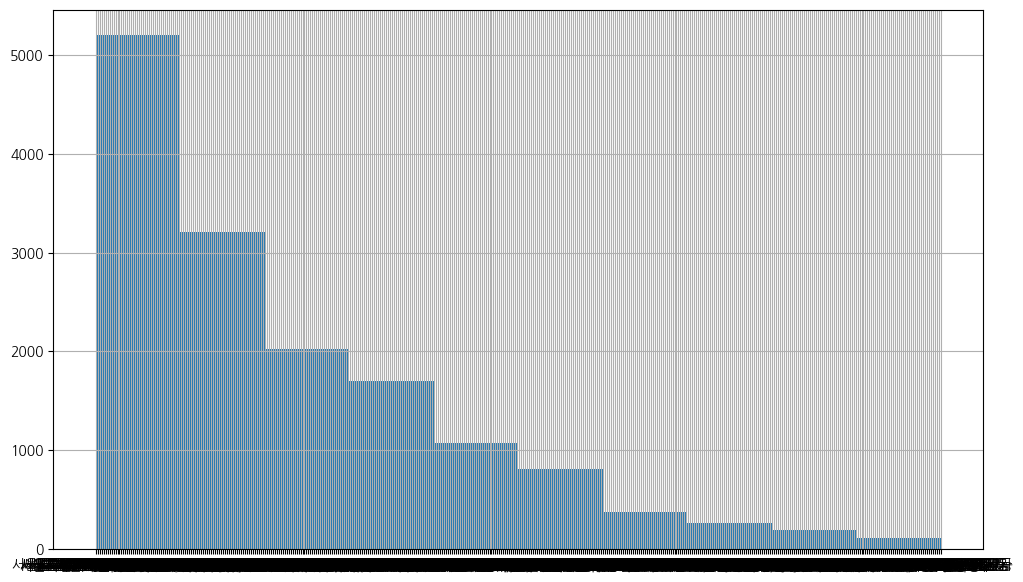

In [55]:
df['시군구'].hist(figsize=(12, 7))

## 연령대 전처리

In [90]:
df["가해운전자 연령"].unique()

array(['57세', '67세', '28세', '59세', '58세', '33세', '36세', '45세', '51세',
       '71세', '31세', '23세', '65세', '70세', '64세', '38세', '50세', '21세',
       '49세', '53세', '42세', '55세', '74세', '46세', '62세', '26세', '40세',
       '34세', '78세', '39세', '56세', '41세', '47세', '44세', '29세', '60세',
       '54세', '66세', '69세', '25세', '35세', '30세', '미분류', '48세', '61세',
       '37세', '63세', '27세', '24세', '43세', '77세', '73세', '20세', '52세',
       '68세', '32세', '72세', '75세', '17세', '79세', '18세', '19세', '22세',
       '82세', '15세', '87세', '76세', '80세', '13세', '11세', '85세', '83세',
       '9세', '81세', '84세', '16세', '91세', '7세', '86세', '12세', '10세', '14세',
       '90세', '88세'], dtype=object)

In [91]:
df["가해운전자 연령"].value_counts()

가해운전자 연령
61세    406
미분류    371
60세    365
62세    361
52세    349
      ... 
91세      2
7세       1
10세      1
90세      1
88세      1
Name: count, Length: 84, dtype: int64

In [92]:
import re

# 숫자 부분만 추출하는 함수 정의
def remove_non_numeric(age):
    if isinstance(age, str):
        # 정규 표현식을 사용하여 숫자만 추출
        numeric_part = re.findall(r'\d+', age)
        if numeric_part:
            return int(numeric_part[0])
    return age

# '피해운전자 연령' 컬럼에 함수 적용
df['피해운전자 연령'] =df['피해운전자 연령'].apply(remove_non_numeric)
df['가해운전자 연령'] = df['가해운전자 연령'].apply(remove_non_numeric)


# 결과 확인
print(df['피해운전자 연령'].unique())
print(df['가해운전자 연령'].unique())

[26 60 50 22 23 35 30 21 49 51 73 19 25 28 38 61 16 66 46 33 57 41 44 48
 24 43 56 18 39 47 52 36 40 65 31 17 69 53 20 81 32 29 27 55 64 54 42 37
 59 45 79 34 63 71 75 62 58 78 77 67 72 68 76 70 '미분류' 74 86 14 84 87 80
 82 83 15]
[57 67 28 59 58 33 36 45 51 71 31 23 65 70 64 38 50 21 49 53 42 55 74 46
 62 26 40 34 78 39 56 41 47 44 29 60 54 66 69 25 35 30 '미분류' 48 61 37 63
 27 24 43 77 73 20 52 68 32 72 75 17 79 18 19 22 82 15 87 76 80 13 11 85
 83 9 81 84 16 91 7 86 12 10 14 90 88]


In [93]:
# '미분류'가 아닌 가해운전자 연령 데이터의 평균을 계산
mean_age = df[df["가해운전자 연령"] != '미분류']["가해운전자 연령"].astype(float).mean()
mean_age1 = df[df["피해운전자 연령"] != '미분류']["피해운전자 연령"].astype(float).mean()

# '미분류' 값을 평균 연령으로 대체
df["가해운전자 연령"] = df["가해운전자 연령"].replace('미분류', mean_age)
df["피해운전자 연령"] = df["피해운전자 연령"].replace('미분류', mean_age1)

In [94]:
import pandas as pd

# 라벨링 함수
def label_age(age):
    if 1 <= age <10:
        return '10대 미만'
    elif 10 <= age <20:
        return '10대'
    elif 20 <= age <30:
        return '20대'
    elif 30 <= age <40:
        return '30대'
    elif 40 <= age <50:
        return '40대'
    elif 50 <= age <60:
        return '50대'
    elif 60 <= age <70:
        return '60대'
    elif 70 <= age <80:
        return '70대'
    else:
        return '80세 이상'

# '가해운전자 연령' 컬럼에 라벨링 적용
df['가해운전자 연령대'] = df['가해운전자 연령'].apply(label_age)
age_groups = ['10대 미만', '10대', '20대', '30대', '40대','50대','60대','70대','80세 이상']
offend_age_group_counts = df['가해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)

# '피해운전자 연령' 컬럼에 라벨링 적용
df['피해운전자 연령대'] =df['피해운전자 연령'].apply(label_age)
victim_age_group_counts = df['피해운전자 연령대'].value_counts().reindex(age_groups, fill_value=0)


print(offend_age_group_counts)
print(victim_age_group_counts)

가해운전자 연령대
10대 미만       6
10대        243
20대       1662
30대       2560
40대       2850
50대       3158
60대       3175
70대       1160
80세 이상     130
Name: count, dtype: int64
피해운전자 연령대
10대 미만       0
10대        479
20대       3650
30대       4100
40대       3423
50대       2131
60대        928
70대        205
80세 이상      28
Name: count, dtype: int64


In [95]:
df['가해운전자 연령대']

0        50대
1        60대
2        20대
3        50대
4        50대
        ... 
14939    70대
14940    60대
14941    50대
14942    60대
14943    60대
Name: 가해운전자 연령대, Length: 14944, dtype: object

## 사고일시 전처리

In [96]:
df["사고일시"].head()

0    2021년 1월 1일 01시
1    2021년 1월 1일 11시
2    2021년 1월 1일 14시
3    2021년 1월 1일 19시
4    2021년 1월 1일 19시
Name: 사고일시, dtype: object

In [97]:
# 시간 정보를 추출하는 함수
def extract_hour(time_str):
    match = re.search(r'\d{1,2}시$', time_str)
    if match:
        return match.group()
    else:
        return None

df['시간'] = df['사고일시'].apply(extract_hour)
sorted(df['시간'].unique())

['00시',
 '01시',
 '02시',
 '03시',
 '04시',
 '05시',
 '06시',
 '07시',
 '08시',
 '09시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시',
 '23시']

In [98]:
# 시간대를 라벨링하는 함수
def label_time_period(time_str):
    if any(hour in time_str for hour in ['01시', '02시', '03시']):
        return '01:00 - 03:00'
    elif any(hour in time_str for hour in ['04시', '05시', '06시']):
        return '04:00 - 06:00'
    elif any(hour in time_str for hour in ['07시', '08시', '09시']):
        return '07:00 - 09:00'
    elif any(hour in time_str for hour in ['10시', '11시', '12시']):
        return '10:00 - 12:00'
    elif any(hour in time_str for hour in ['13시', '14시', '15시']):
        return '13:00 - 15:00'
    elif any(hour in time_str for hour in ['16시', '17시', '18시']):
        return '16:00 - 18:00'
    elif any(hour in time_str for hour in ['19시', '20시', '21시']):
        return '19:00 - 21:00'
    elif any(hour in time_str for hour in ['22시', '23시', '00시']):
        return '22:00 - 24:00'
    else:
        return '0'


# 데이터프레임에 라벨링 적용
df['사고시간대'] = df['시간'].apply(label_time_period)
df['사고시간대'].value_counts()

사고시간대
19:00 - 21:00    3376
16:00 - 18:00    3168
10:00 - 12:00    2519
13:00 - 15:00    2518
22:00 - 24:00    1636
07:00 - 09:00     906
01:00 - 03:00     482
04:00 - 06:00     339
Name: count, dtype: int64

# 데이터 인코딩

In [99]:
print(df['시군구'].unique())#원핫 인코딩
print(df['사고시간대'].unique())#원핫 인코딩
print(df['요일'].unique()) #원핫 인코딩
print(df['사고내용'].unique()) #원핫 인코딩
print(df['법규위반'].unique()) #원핫 인코딩
print(df['노면상태'].unique()) #원핫 인코딩
print(df['기상상태'].unique()) #원핫 인코딩
print(df['도로형태'].unique()) #원핫 인코딩
print(df['가해운전자 차종'].unique()) #원핫 인코딩
print(df['가해운전자 연령대'].unique()) #원핫 인코딩
print(df['사고유형'].unique()) #원핫 인코딩

print(df['피해운전자 상해정도'].unique()) #레이블 인코딩

['서울특별시 강북구 미아동' '서울특별시 중랑구 중화동' '서울특별시 금천구 독산동' '서울특별시 동대문구 전농동'
 '서울특별시 광진구 화양동' '서울특별시 중랑구 면목동' '서울특별시 관악구 봉천동' '서울특별시 마포구 구수동'
 '서울특별시 영등포구 영등포동7가' '서울특별시 서초구 방배동' '서울특별시 중랑구 망우동' '서울특별시 동대문구 휘경동'
 '서울특별시 영등포구 신길동' '서울특별시 강동구 암사동' '서울특별시 서초구 서초동' '서울특별시 종로구 창성동'
 '서울특별시 강남구 논현동' '서울특별시 은평구 구산동' '서울특별시 강북구 수유동' '서울특별시 구로구 개봉동'
 '서울특별시 노원구 공릉동' '서울특별시 서대문구 홍은동' '서울특별시 동작구 사당동' '서울특별시 동대문구 이문동'
 '서울특별시 용산구 보광동' '서울특별시 용산구 신계동' '서울특별시 은평구 갈현동' '서울특별시 송파구 방이동'
 '서울특별시 양천구 목동' '서울특별시 구로구 구로동' '서울특별시 영등포구 문래동3가' '서울특별시 강남구 대치동'
 '서울특별시 성북구 석관동' '서울특별시 성동구 성수동1가' '서울특별시 서초구 우면동' '서울특별시 노원구 월계동'
 '서울특별시 강북구 번동' '서울특별시 금천구 가산동' '서울특별시 강남구 역삼동' '서울특별시 서대문구 북가좌동'
 '서울특별시 용산구 후암동' '서울특별시 은평구 역촌동' '서울특별시 강서구 마곡동' '서울특별시 종로구 서린동'
 '서울특별시 서대문구 남가좌동' '서울특별시 중랑구 신내동' '서울특별시 성북구 돈암동' '서울특별시 서대문구 연희동'
 '서울특별시 강남구 청담동' '서울특별시 서대문구 북아현동' '서울특별시 성북구 정릉동' '서울특별시 성북구 동소문동6가'
 '서울특별시 강서구 내발산동' '서울특별시 강서구 화곡동' '서울특별시 도봉구 창동' '서울특별시 은평구 응암동'
 '서울특별시 송파구 석촌동' '서울특별시 강서구 가양동' '서울특별시 성북구 장위동' '서울특별시 서대문구 창천동'
 '

In [112]:
df.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도', '가해운전자 연령대', '피해운전자 연령대', '시간', '사고시간대',
       '피해운전자 상해정도_LabelEncoded'],
      dtype='object')

In [100]:
input_variables=['사고시간대','요일','시군구','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']
output_variable='피해운전자 상해정도'

XM=df[input_variables]
y=df['피해운전자 상해정도']
XM.shape, y.shape

((14944, 11), (14944,))

In [101]:
XM.columns

Index(['사고시간대', '요일', '시군구', '사고내용', '법규위반', '노면상태', '기상상태', '도로형태',
       '가해운전자 차종', '가해운전자 연령대', '사고유형'],
      dtype='object')

In [102]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()


# 피해운전자 상해정도 레이블 인코딩을 위한 매핑 딕셔너리
victim_injury_mapping = {
    '상해없음': 0,
    '부상신고': 1,
    '기타불명': 2,
    '경상': 3,
    '중상': 4,
    '사망': 5
}

# 인코딩할 컬럼들
input_variables=['사고시간대','요일','시군구','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']
output_variable='피해운전자 상해정도'

# 원-핫 인코더 초기화
one_hot_encoder = OneHotEncoder(sparse=False)

# 레이블 인코딩 적용
df['피해운전자 상해정도_LabelEncoded'] = df['피해운전자 상해정도'].map(victim_injury_mapping)

# 원-핫 인코딩 적용 (피해운전자 상해정도 제외)
XM = pd.get_dummies(df[input_variables])

# 피해운전자 상해정도
y = df['피해운전자 상해정도_LabelEncoded']

# 인코딩된 결과 확인
print(XM.head())
print(y)

# 데이터셋의 형태 확인
XM.shape, y.shape

   사고시간대_01:00 - 03:00  사고시간대_04:00 - 06:00  사고시간대_07:00 - 09:00  \
0                 True                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   사고시간대_10:00 - 12:00  사고시간대_13:00 - 15:00  사고시간대_16:00 - 18:00  \
0                False                False                False   
1                 True                False                False   
2                False                 True                False   
3                False                False                False   
4                False                False                False   

   사고시간대_19:00 - 21:00  사고시간대_22:00 - 24:00  요일_금요일  요일_목요일  ...  \
0                False                False    True   False  ...   
1                False                False   

((14944, 502), (14944,))

In [103]:
  XM.head()

사고시간대_01:00 - 03:00  사고시간대_04:00 - 06:00  사고시간대_07:00 - 09:00  \
0                 True                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   사고시간대_10:00 - 12:00  사고시간대_13:00 - 15:00  사고시간대_16:00 - 18:00  \
0                False                False                False   
1                 True                False                False   
2                False                 True                False   
3                False                False                False   
4                False                False                False   

   사고시간대_19:00 - 21:00  사고시간대_22:00 - 24:00  요일_금요일  요일_목요일  ...  \
0                False                False    True   False  ...   
1                False                False    True   False  ...   
2                False                False    True   False  ...   
3                 True                False    True   False  ...   
4                 True                False    True   False  ...   

   가해운전자 연령대_40대  가해운전자 연령대_50대  가해운전자 연령대_60대  가해운전자 연령대_70대  \
0          False           True          False          False   
1          False          False           True          False   
2          False          False          False          False   
3          False           True          False          False   
4          False           True          False          False   

   가해운전자 연령대_80세 이상  사고유형_차대차 - 기타  사고유형_차대차 - 정면충돌  사고유형_차대차 - 추돌  \
0             False           True            False          False   
1             False           True            False          False   
2             False          False            False          False   
3             False           True            False          False   
4             False          False            False           True   

   사고유형_차대차 - 측면충돌  사고유형_차대차 - 후진중충돌  
0            False             False  
1            False             False  
2             True             False  
3            False             False  
4            False             False  

[5 rows x 502 columns]

In [104]:
print(y.unique())
print(df['피해운전자 상해정도'].unique())

[3 4 1 0 5 2]
['경상' '중상' '부상신고' '상해없음' '사망' '기타불명']


# 상관관계

**상관관계 값의 해석**
* 1: 두 변수 간의 완벽한 양의 상관관계. 한 변수가 증가할 때 다른 변수도 증가.
* 0: 두 변수 간의 상관관계가 없음. 두 변수 간에 직선적인 관계가 없음.
* -1: 두 변수 간의 완벽한 음의 상관관계. 한 변수가 증가할 때 다른 변수는 감소.

**상관관계의 강도**
* 0.7 ~ 1.0 (또는 -0.7 ~ -1.0): 강한 상관관계
* 0.3 ~ 0.7 (또는 -0.3 ~ -0.7): 중간 정도의 상관관계
* 0.0 ~ 0.3 (또는 -0.3 ~ 0.0): 약한 상관관계

In [49]:
# 상관관계 행렬 계산
correlation_matrix = XM.corr()
correlation_matrix

사고시간대_01:00 - 03:00  사고시간대_04:00 - 06:00  \
사고시간대_01:00 - 03:00             1.000000            -0.027814   
사고시간대_04:00 - 06:00            -0.027814             1.000000   
사고시간대_07:00 - 09:00            -0.046379            -0.038704   
사고시간대_10:00 - 12:00            -0.082201            -0.068599   
사고시간대_13:00 - 15:00            -0.082181            -0.068582   
...                                  ...                  ...   
사고유형_차대차 - 정면충돌                 0.023069             0.012982   
사고유형_차대차 - 추돌                   0.033358             0.008479   
사고유형_차대차 - 측면충돌                -0.012051             0.017924   
사고유형_차대차 - 후진중충돌               -0.006303            -0.012642   
사고내용_LabelEncoded               0.034511             0.042257   

                     사고시간대_07:00 - 09:00  사고시간대_10:00 - 12:00  \
사고시간대_01:00 - 03:00            -0.046379            -0.082201   
사고시간대_04:00 - 06:00            -0.038704            -0.068599   
사고시간대_07:00 - 09:00             1.000000            -0.114387   
사고시간대_10:00 - 12:00            -0.114387             1.000000   
사고시간대_13:00 - 15:00            -0.114360            -0.202688   
...                                  ...                  ...   
사고유형_차대차 - 정면충돌                -0.007431            -0.016004   
사고유형_차대차 - 추돌                   0.001504            -0.017540   
사고유형_차대차 - 측면충돌                 0.018884             0.028862   
사고유형_차대차 - 후진중충돌               -0.016641             0.011827   
사고내용_LabelEncoded               0.029544            -0.002879   

                     사고시간대_13:00 - 15:00  사고시간대_16:00 - 18:00  \
사고시간대_01:00 - 03:00            -0.082181            -0.094690   
사고시간대_04:00 - 06:00            -0.068582            -0.079021   
사고시간대_07:00 - 09:00            -0.114360            -0.131767   
사고시간대_10:00 - 12:00            -0.202688            -0.233539   
사고시간대_13:00 - 15:00             1.000000            -0.233483   
...                                  ...                  ...   
사고유형_차대차 - 정면충돌                -0.015966            -0.023009   
사고유형_차대차 - 추돌                  -0.021245            -0.014991   
사고유형_차대차 - 측면충돌                 0.018197            -0.006079   
사고유형_차대차 - 후진중충돌                0.032248            -0.017217   
사고내용_LabelEncoded               0.000853            -0.030246   

                     사고시간대_19:00 - 21:00  사고시간대_22:00 - 24:00    요일_금요일  \
사고시간대_01:00 - 03:00            -0.098624            -0.064010 -0.017414   
사고시간대_04:00 - 06:00            -0.082304            -0.053418  0.010224   
사고시간대_07:00 - 09:00            -0.137241            -0.089073  0.007926   
사고시간대_10:00 - 12:00            -0.243242            -0.157871 -0.009646   
사고시간대_13:00 - 15:00            -0.243184            -0.157833 -0.013431   
...                                  ...                  ...       ...   
사고유형_차대차 - 정면충돌                 0.012761             0.037792 -0.000827   
사고유형_차대차 - 추돌                  -0.001260             0.043743  0.002247   
사고유형_차대차 - 측면충돌                -0.031877            -0.021930  0.000107   
사고유형_차대차 - 후진중충돌                0.008199            -0.018969  0.005419   
사고내용_LabelEncoded              -0.025421             0.013809 -0.009741   

                       요일_목요일  ...  가해운전자 연령대_50대  가해운전자 연령대_60대  \
사고시간대_01:00 - 03:00  0.007444  ...      -0.020279       0.007958   
사고시간대_04:00 - 06:00  0.000087  ...      -0.000703       0.016454   
사고시간대_07:00 - 09:00  0.016817  ...       0.009301      -0.001020   
사고시간대_10:00 - 12:00 -0.004706  ...       0.007303       0.009095   
사고시간대_13:00 - 15:00 -0.017974  ...      -0.006179       0.004382   
...                       ...  ...            ...            ...   
사고유형_차대차 - 정면충돌     -0.010060  ...       0.011381      -0.012681   
사고유형_차대차 - 추돌        0.007298  ...      -0.013398      -0.021821   
사고유형_차대차 - 측면충돌      0.011378  ...      -0.000418       0.014546   
사고유형_차대차 - 후진중충돌    -0.018877  ...       0.004688       0.008130   
사고내용_LabelEncoded   -0.003736

**히트맵의 해석**
* 진한 빨간색: 강한 양의 상관관계
* 진한 파란색: 강한 음의 상관관계
* 하얀색 또는 회색: 상관관계가 거의 없음

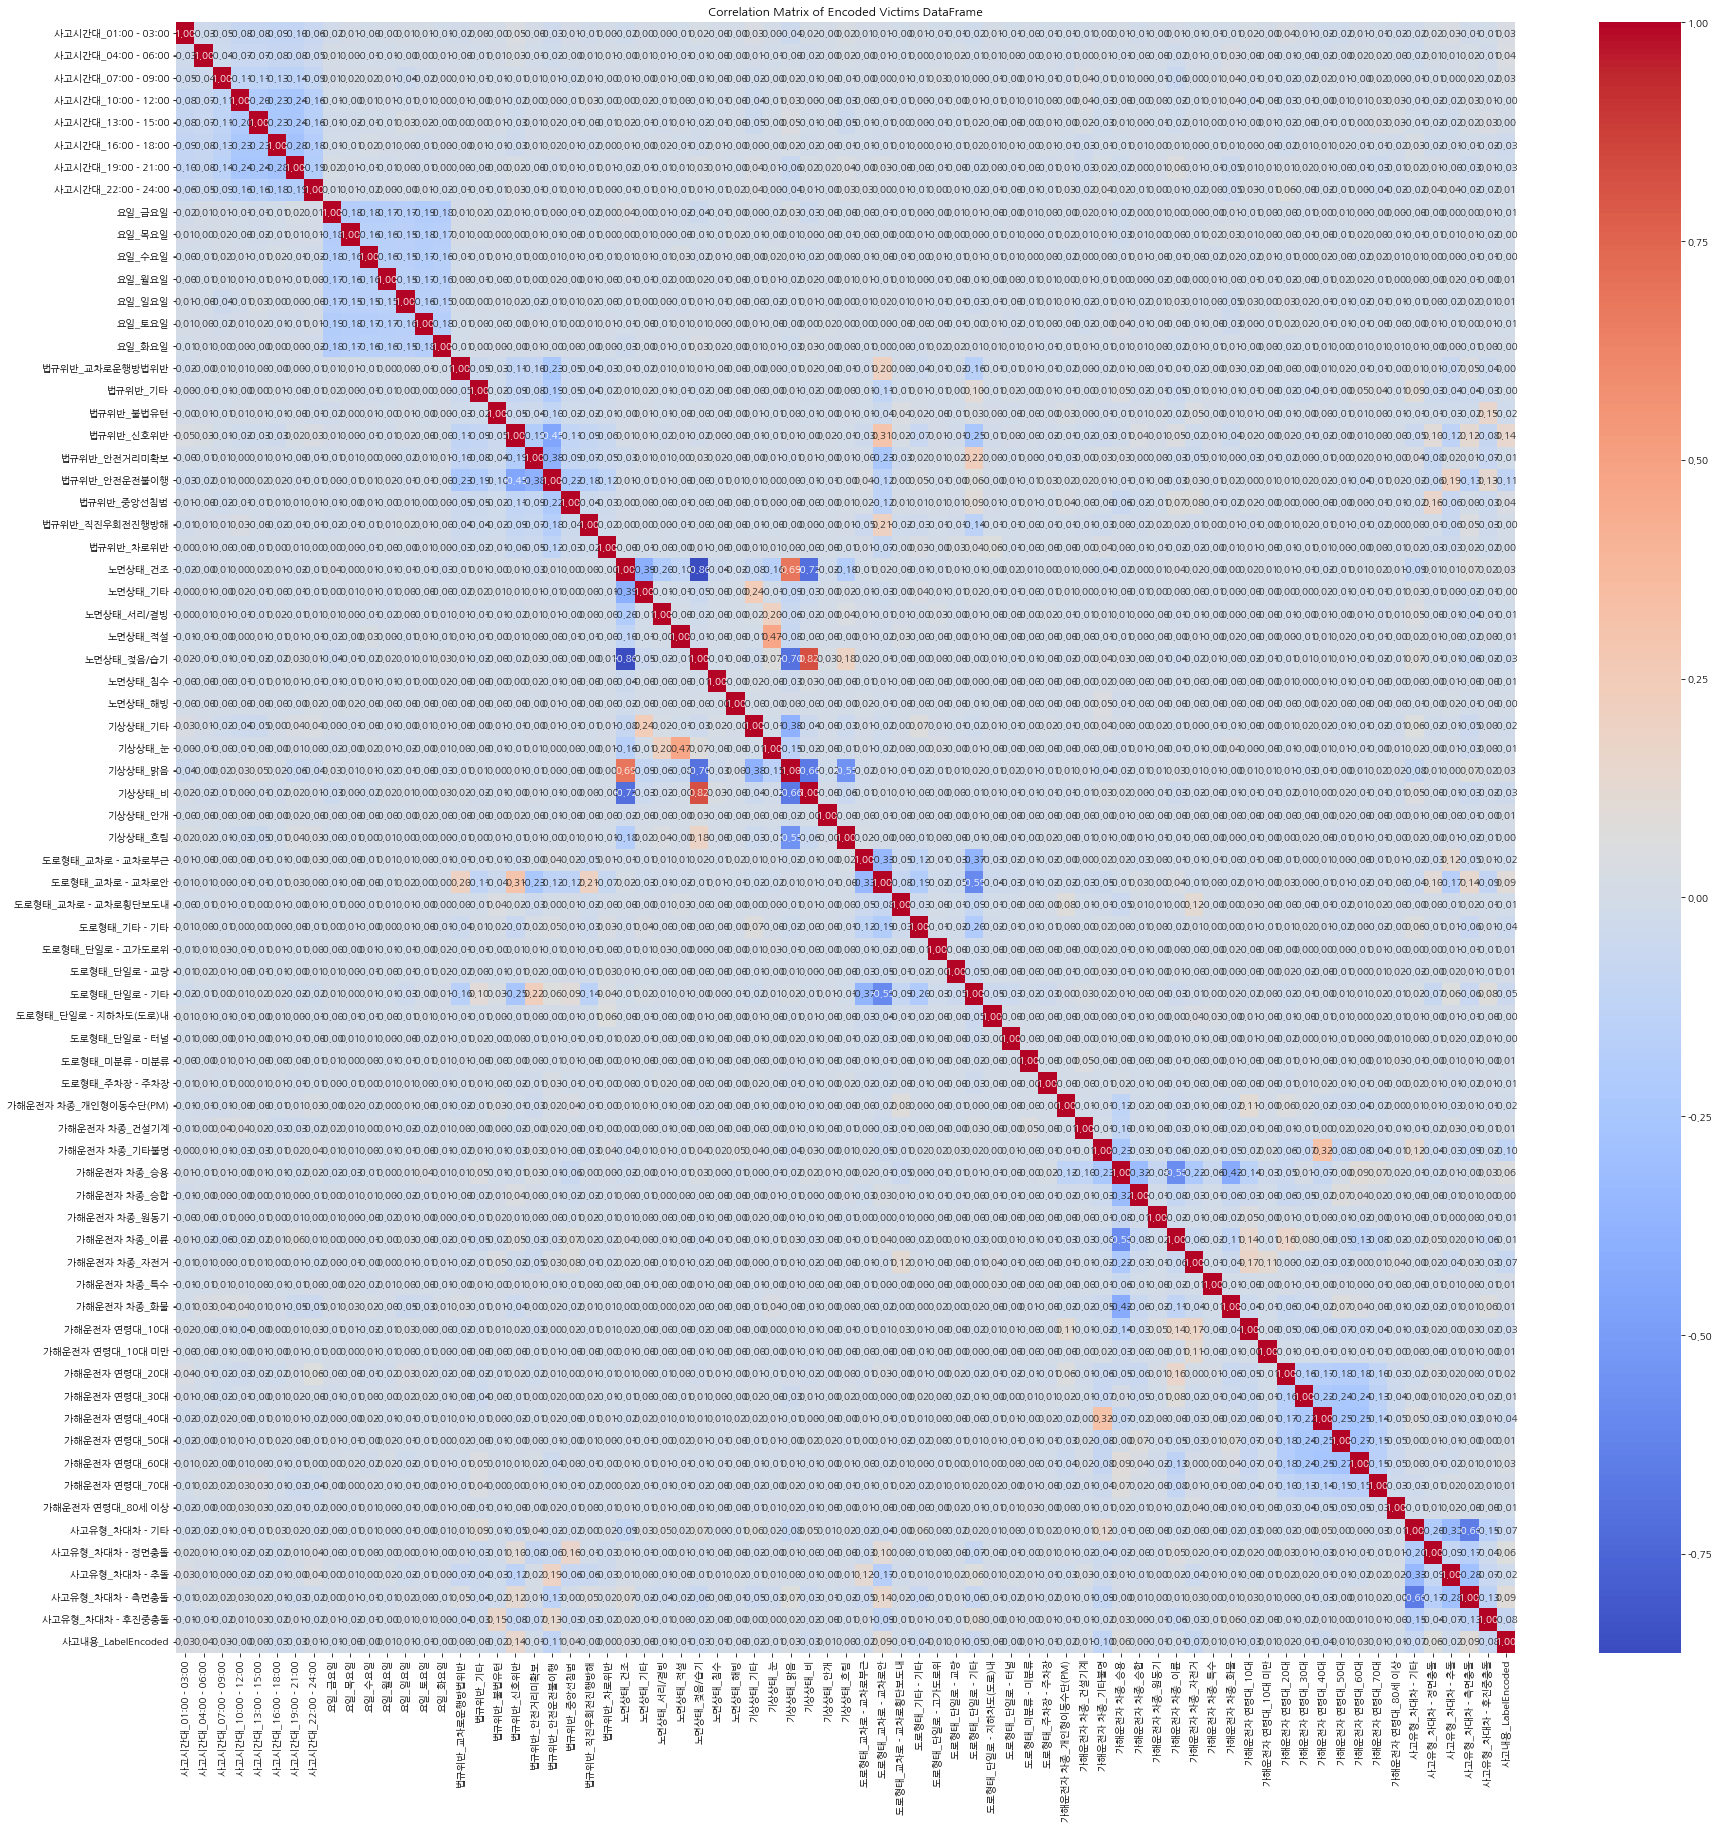

In [ ]:
# 상관관계 히트맵 시각화
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Victims DataFrame')
plt.show()

In [51]:
# 나눔고딕 폰트 설치
!apt-get install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [54]:
correlation_matrix.hist(figsize=(100, 100), bins=8)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


# ML application

## Scaling / Data Split

In [105]:
#스케일링
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
scaler.fit(XM)
X = scaler.transform(XM)

In [106]:
from sklearn.model_selection import train_test_split

#train, test 8:2로 나누기
X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_trn.shape, y_trn.shape, X_test.shape, y_test.shape)

#train set을 8:2로 train, validation 나누기
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=0.2, random_state = 42)
print(X_trn.shape, y_trn.shape, X_val.shape, y_val.shape)

(11955, 502) (11955,) (2989, 502) (2989,)
(9564, 502) (9564,) (2391, 502) (2391,)


## 평가지표

In [107]:
#평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_valid, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred, average='macro')  # 'macro' average for multiclass
    recall = recall_score(y_val, pred, average='macro')        # 'macro' average for multiclass
    f1 = f1_score(y_val, pred, average='macro')                # 'macro' average for multiclass
    roc_auc = roc_auc_score(y_val, pred_proba, multi_class='ovr')  # for multiclass ROC AUC
    print('오차 행렬:')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}\n'.format(accuracy, precision, recall, f1, roc_auc))

## 기본설정 : LogisticRegression, RandomForest, KNN, XgBoost, LightGBM

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# RandomForest
rf_classifier = RandomForestClassifier(random_state=42)

# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=8)

# XgBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)

# LightGBM
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# classifiers 학습/예측/평가
classifiers = [lg_classifier, rf_classifier, knn_classifier, xgb_classifier, lgb_classifier]
for classifier in classifiers:
    classifier.fit(X_trn, y_trn)
    pred = classifier.predict(X_val)
    pred_proba = classifier.predict_proba(X_val)
    class_name = classifier.__class__.__name__
    print(f'{class_name}')
    get_clf_eval(y_val, pred, pred_proba)

LogisticRegression
오차 행렬:
[[  13    8    0   26    6    0]
 [   5   75    0    1    0    0]
 [   0    1    0    7    0    0]
 [   6    0    0 1510   20    0]
 [   1    0    1    1  699    1]
 [   0    0    0    0    0   10]]
정확도: 0.9649, 정밀도: 0.7106, 재현율: 0.6914, F1: 0.6923, AUC:0.8942

RandomForestClassifier
오차 행렬:
[[   7   11    0   29    6    0]
 [   2   78    0    1    0    0]
 [   0    1    0    7    0    0]
 [   1    0    0 1515   20    0]
 [   0    0    0    0  702    1]
 [   0    0    0    0    0   10]]
정확도: 0.9670, 정밀도: 0.7360, 재현율: 0.6800, F1: 0.6749, AUC:0.8955



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
오차 행렬:
[[   1    2    0   46    4    0]
 [   0    6    0   70    5    0]
 [   0    0    0    8    0    0]
 [   0    0    0 1486   50    0]
 [   0    0    0  476  226    1]
 [   0    0    0    2    1    7]]
정확도: 0.7219, 정밀도: 0.6878, 재현율: 0.3470, F1: 0.3711, AUC:0.7400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier
오차 행렬:
[[  18    5    0   24    6    0]
 [   6   74    0    1    0    0]
 [   1    0    0    7    0    0]
 [  10    1    0 1505   20    0]
 [   3    0    0    0  699    1]
 [   0    0    0    0    0   10]]
정확도: 0.9645, 정밀도: 0.7085, 재현율: 0.7046, F1: 0.7043, AUC:0.9027



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 9564, number of used features: 189
[LightGBM] [Info] Start training from score -3.656373
[LightGBM] [Info] Start training from score -3.339761
[LightGBM] [Info] Start training from score -5.700025
[LightGBM] [Info] Start training from score -0.469920
[LightGBM] [Info] Start training from score -1.183004
[LightGBM] [Info] Start training from score -5.528175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost Feature importances

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# XGBoost feature importances
xgb_importances = xgb_classifier.feature_importances_


# Feature names 설정
if isinstance(X_trn, np.ndarray):
    features = [f'Feature {i}' for i in range(X_trn.shape[1])]
else:
    features = X_trn.columns

# Feature importances 시각화 (상위 30개 피처만)
indices = np.argsort(xgb_importances)[-30:]  # 상위 50개의 피처 선택

plt.figure(figsize=(150, 120))
plt.title('Top 30 Feature Importances')
plt.barh(range(len(indices)), xgb_importances[indices], align='center')
plt.yticks(range(len(indices)), [XM.columns[i] for i in indices])
plt.xlabel('XGBoost Feature Importance')
plt.show()

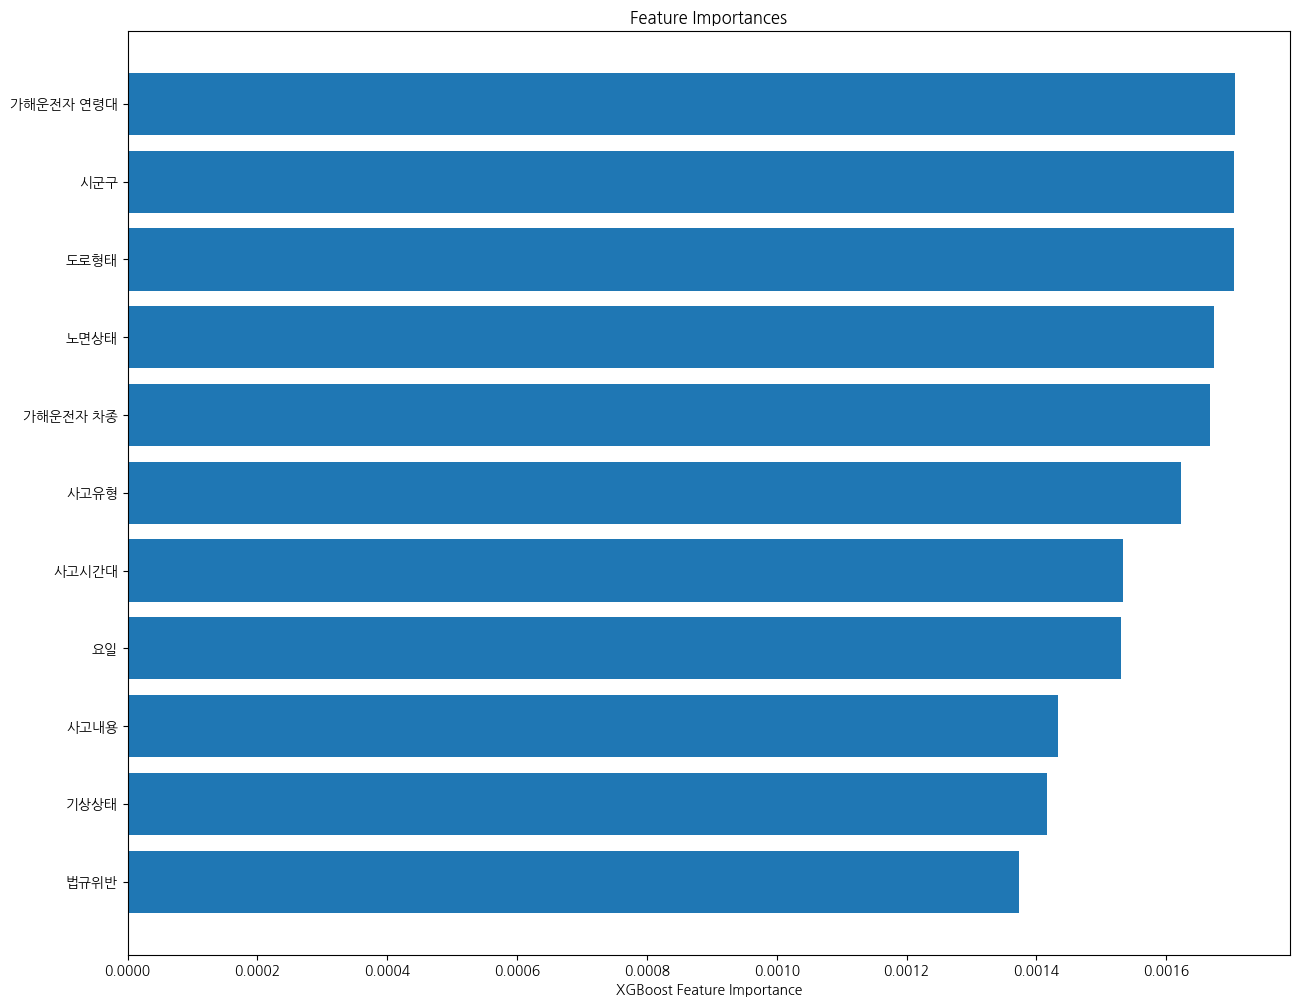

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# XGBoost feature importances
xgb_importances = xgb_classifier.feature_importances_

# y축에 사용할 특정 열 선택
selected_columns = ['사고시간대','요일','시군구','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']

# 데이터 크기 맞추기
min_length = min(len(xgb_importances), len(selected_columns))
xgb_importances = xgb_importances[:min_length]
features = selected_columns[:min_length]

# Feature importances 시각화
indices = np.argsort(xgb_importances)

plt.figure(figsize=(15, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), xgb_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('XGBoost Feature Importance')
plt.show()

### LightGBM feature importances

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# LightGBM feature importances
lgb_importances = lgb_classifier.feature_importances_


# Feature names 설정
if isinstance(X_trn, np.ndarray):
    features = [f'Feature {i}' for i in range(X_trn.shape[1])]
else:
    features = X_trn.columns

# Feature importances 시각화 (상위 30개 피처만)
indices = np.argsort(lgb_importances)[-30:]  # 상위 50개의 피처 선택

plt.figure(figsize=(150, 120))
plt.title('Top 30 Feature Importances')
plt.barh(range(len(indices)), lgb_importances[indices], align='center')
plt.yticks(range(len(indices)), [XM.columns[i] for i in indices])
plt.xlabel('LightGBM Feature Importance')
plt.show()

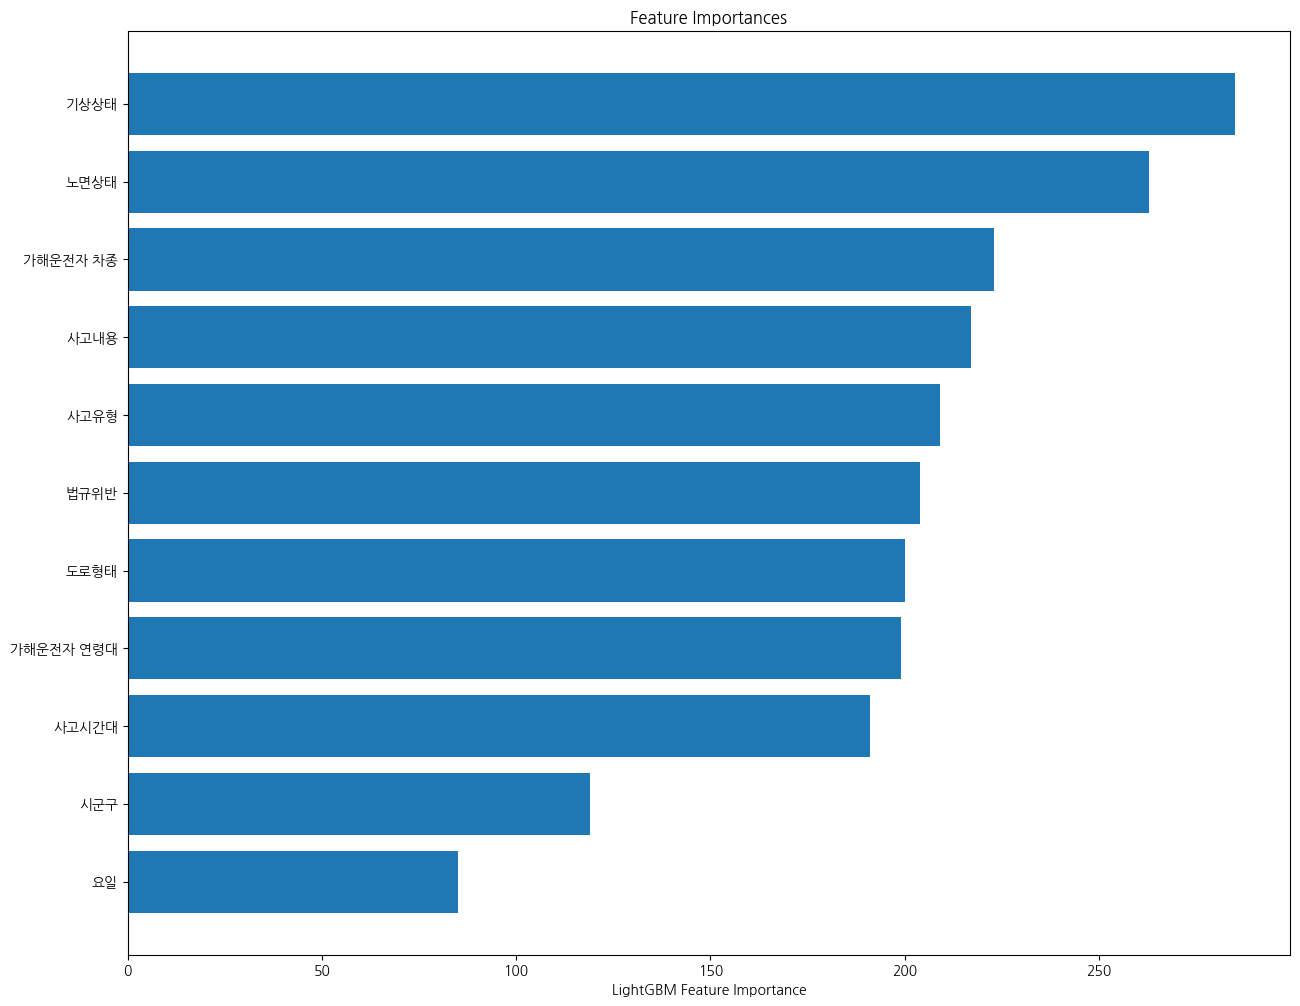

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# LightGBM feature importances
lgb_importances = lgb_classifier.feature_importances_

# y축에 사용할 특정 열 선택
selected_columns = ['사고시간대','요일','시군구','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']

# 데이터 크기 맞추기
min_length = min(len(lgb_importances), len(selected_columns))
lgb_importances = lgb_importances[:min_length]
features = selected_columns[:min_length]

# Feature importances 시각화
indices = np.argsort(lgb_importances)  # lgb_importances의 정렬된 인덱스 사용

plt.figure(figsize=(15, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), lgb_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('LightGBM Feature Importance')
plt.show()

## Soft Voting Ensemble(기본 설정 XgBoost, LightGBM)

In [109]:
from sklearn.ensemble import VotingClassifier

# Soft Voting 기반 앙상블
# 개별 모델로 XgBoost, LightGBM 사용
vo_clf = VotingClassifier(estimators=[('XGB', xgb_classifier), ('LGB', lgb_classifier)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_trn, y_trn)
pred = vo_clf.predict(X_val)
pred_proba = vo_clf.predict_proba(X_val)
print('Voting Classifier')
get_clf_eval(y_val, pred, pred_proba)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 9564, number of used features: 189
[LightGBM] [Info] Start training from score -3.656373
[LightGBM] [Info] Start training from score -3.339761
[LightGBM] [Info] Start training from score -5.700025
[LightGBM] [Info] Start training from score -0.469920
[LightGBM] [Info] Start training from score -1.183004
[LightGBM] [Info] Start training from score -5.528175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Soft Voting Ensemble  Feature importances

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# XGBoost feature importances
xgb_importances = xgb_classifier.feature_importances_
lgb_importances = lgb_classifier.feature_importances_

# 두 모델의 feature importances를 평균하여 결합
avg_importances = np.mean([xgb_importances, lgb_importances], axis=0)

# Feature names 설정
if isinstance(X_trn, np.ndarray):
    features = [f'Feature {i}' for i in range(X_trn.shape[1])]
else:
    features = X_trn.columns

# Feature importances 시각화 (상위 50개 피처만)
indices = np.argsort(avg_importances)[-50:]  # 상위 50개의 피처 선택

plt.figure(figsize=(150, 120))
plt.title('Top 50 Feature Importances')
plt.barh(range(len(indices)), avg_importances[indices], align='center')
plt.yticks(range(len(indices)), [XM.columns[i] for i in indices])
plt.xlabel('Average Feature Importance')
plt.show()


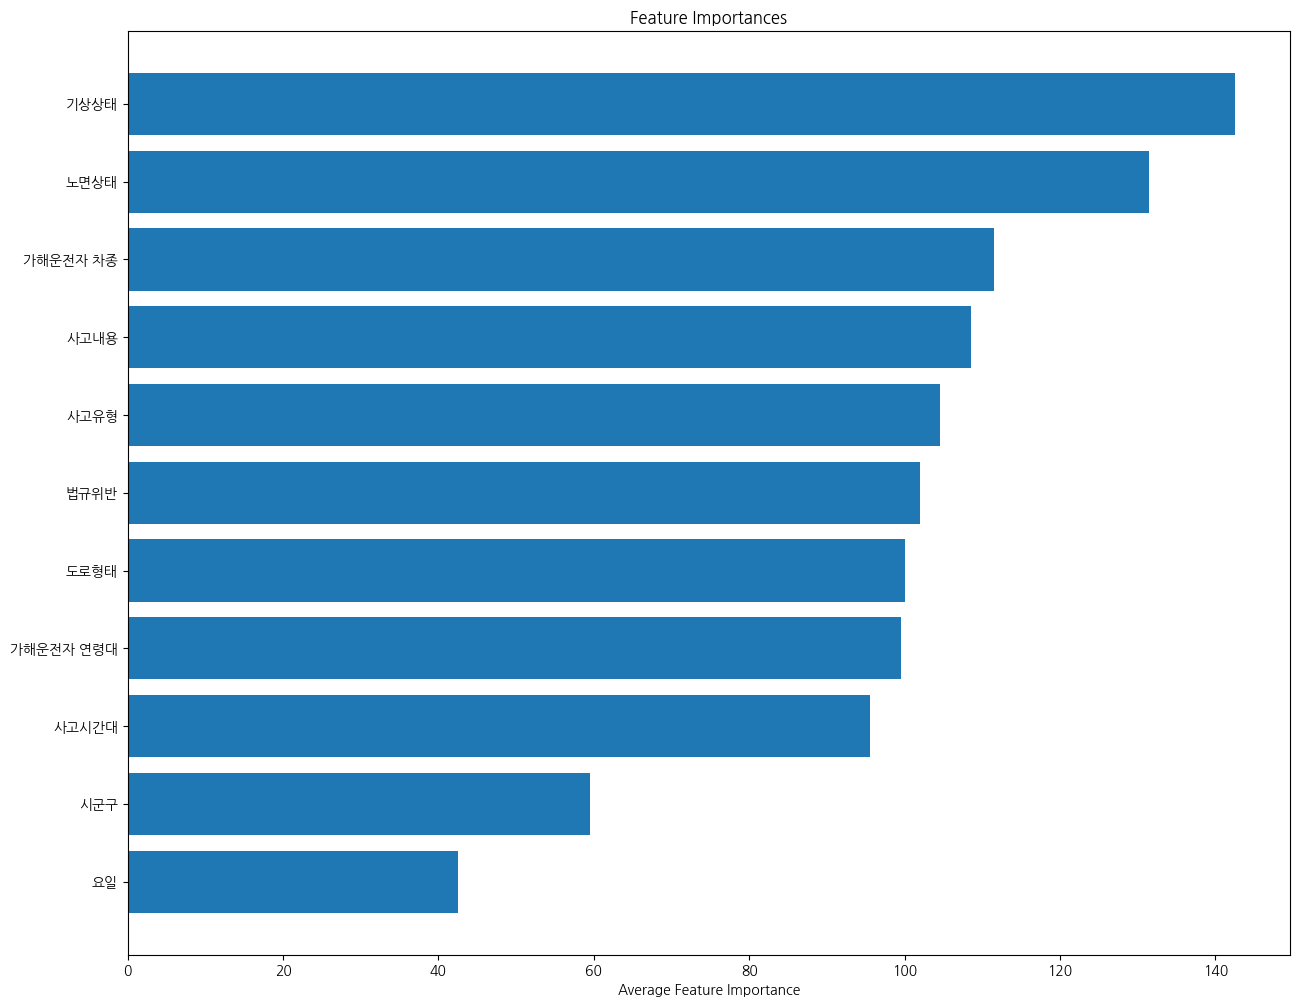

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# XGBoost feature importances
xgb_importances = xgb_classifier.feature_importances_
lgb_importances = lgb_classifier.feature_importances_

# 두 모델의 feature importances를 평균하여 결합
avg_importances = np.mean([xgb_importances, lgb_importances], axis=0)

# y축에 사용할 특정 열 선택
selected_columns = ['사고시간대','요일','시군구','사고내용','법규위반','노면상태','기상상태','도로형태','가해운전자 차종','가해운전자 연령대', '사고유형']

# 데이터 크기 맞추기
min_length = min(len(avg_importances), len(selected_columns))
avg_importances = avg_importances[:min_length]
features = selected_columns[:min_length]

# Feature importances 시각화
indices = np.argsort(avg_importances)

plt.figure(figsize=(15, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), avg_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Average Feature Importance')
plt.show()

## Tuned LightGBM

In [117]:
import numpy as np
from scipy.stats import randint
from imblearn.combine import SMOTEENN
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# SMOTEENN를 통한 오버샘플링과 언더샘플링 조합
smote_enn = SMOTEENN(random_state=42)
X_trn_resampled, y_trn_resampled = smote_enn.fit_resample(X_trn, y_trn)


# LightGBM
lgb_model = lgb.LGBMClassifier()

# hyperparameter 분포
param_dist = {
    'n_estimators': np.arange(100, 3001, 100), #결정 트리의 개수
    'num_leaves': randint(20, 50),
    'learning_rate': np.arange(0.005, 0.31, 0.001), #학습률
    'max_depth': np.arange(5, 30, 1), #트리의 최대 깊이
    'min_child_samples': randint(10, 50),
    'subsample': np.arange(0.8, 1.01, 0.1), #학습시 데이터 샘플링 비율
    'colsample_bytree': np.arange(0.8, 1.01, 0.1) #학습시 피처 샘플링 비율
}

# 하이퍼파라미터 튜닝을 위한 RandomSearchCV 이용
random_search = RandomizedSearchCV(estimator=lgb_model,
                                   param_distributions=param_dist,
                                   n_iter=10,  # 100개의 무작위 하이퍼파라미터 조합 시도
                                   scoring='roc_auc_ovr',
                                   cv=3, # 3-폴드 교차 검증 수행
                                   verbose=2, # 상세한 로그 출력
                                   n_jobs=-1, # 모든 가용한 CPU 코어 사용
                                   random_state=42)

random_search.fit(X_trn_resampled, y_trn_resampled)

# 최적의 하이퍼파라미터 조합 출력
best_lgbm_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [118]:
# 최적의 하이퍼파라미터 기준으로 모델 생성
best_lgbm_model = lgb.LGBMClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    num_leaves=random_search.best_params_['num_leaves'],
    learning_rate=random_search.best_params_['learning_rate'],
    max_depth=random_search.best_params_['max_depth'],
    min_child_samples=random_search.best_params_['min_child_samples'],
    subsample=random_search.best_params_['subsample'],
    colsample_bytree=random_search.best_params_['colsample_bytree']
)

# 학습
best_lgbm_model.fit(X_trn, y_trn)

# 평가
y_pred = best_lgbm_model.predict(X_val)
y_pred_proba = best_lgbm_model.predict_proba(X_val)
get_clf_eval(y_val , y_pred, y_pred_proba)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 임의 설정 CatBoost

In [61]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


In [62]:
!pip install -U imbalanced-learn

In [119]:
from catboost import CatBoostClassifier

# 오버샘플링
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_trn_resampled, y_trn_resampled = smote.fit_resample(X_trn, y_trn)


# CatBoost 모델 정의
catboost_model = CatBoostClassifier(iterations=300,  # 반복 횟수 설정
                                    learning_rate=0.02,  # 학습률 설정
                                    depth=10,  # 트리의 깊이 설정
                                    eval_metric='AUC',  # 평가 지표 설정
                                    verbose=200,  # 학습 진행 상황 출력 간격 설정
                                    random_seed=42)  # 랜덤 시드 설정

# 모델 학습
catboost_model.fit(X_trn_resampled, y_trn_resampled, eval_set=(X_val, y_val))

# 검증 데이터로 모델 평가
pred = catboost_model.predict(X_val)
pred_proba = catboost_model.predict_proba(X_val)

class_name = classifier.__class__.__name__
print(f'{class_name}')
get_clf_eval(y_val, pred, pred_proba)

0:	test: 0.9435507	best: 0.9435507 (0)	total: 3.19s	remaining: 15m 52s
200:	test: 0.9426032	best: 0.9469414 (11)	total: 11m 30s	remaining: 5m 40s
299:	test: 0.9431321	best: 0.9469414 (11)	total: 17m 2s	remaining: 0us

bestTest = 0.9469413637
bestIteration = 11

Shrink model to first 12 iterations.
LGBMClassifier
오차 행렬:
[[  27    9    0   12    5    0]
 [   2   78    0    1    0    0]
 [   0    1    0    7    0    0]
 [  89    0   69 1358   20    0]
 [   8    0    0    0  694    1]
 [   0    0    0    0    0   10]]
정확도: 0.9063, 정밀도: 0.6601, 재현율: 0.7240, F1: 0.6809, AUC:0.9117



In [120]:
# 검증 데이터로 모델 평가
pred = catboost_model.predict(X_val)
pred_proba = catboost_model.predict_proba(X_val)
print('catboost_model')
get_clf_eval(y_val, pred, pred_proba)

catboost_model
오차 행렬:
[[  27    9    0   12    5    0]
 [   2   78    0    1    0    0]
 [   0    1    0    7    0    0]
 [  89    0   69 1358   20    0]
 [   8    0    0    0  694    1]
 [   0    0    0    0    0   10]]
정확도: 0.9063, 정밀도: 0.6601, 재현율: 0.7240, F1: 0.6809, AUC:0.9117



In [121]:
smote_enn = SMOTEENN(random_state=42)
X_trn_resampled, y_trn_resampled = smote_enn.fit_resample(X_trn, y_trn)
catbst_model = CatBoostClassifier(random_seed=42)
catbst_model.fit(X_trn_resampled, y_trn_resampled, eval_set=(X_val, y_val))
pred = catbst_model.predict(X_val)
pred_proba = catbst_model.predict_proba(X_val)
get_clf_eval(y_val, pred, pred_proba)

Learning rate set to 0.11562
0:	learn: 1.4522640	test: 1.5459413	best: 1.5459413 (0)	total: 253ms	remaining: 4m 12s
1:	learn: 1.2441651	test: 1.4111209	best: 1.4111209 (1)	total: 436ms	remaining: 3m 37s
2:	learn: 1.0962130	test: 1.2605797	best: 1.2605797 (2)	total: 627ms	remaining: 3m 28s
3:	learn: 0.9838784	test: 1.1655986	best: 1.1655986 (3)	total: 816ms	remaining: 3m 23s
4:	learn: 0.8903619	test: 1.0938613	best: 1.0938613 (4)	total: 1.01s	remaining: 3m 21s
5:	learn: 0.8186197	test: 1.0352392	best: 1.0352392 (5)	total: 1.19s	remaining: 3m 17s
6:	learn: 0.7603909	test: 1.0028864	best: 1.0028864 (6)	total: 1.38s	remaining: 3m 16s
7:	learn: 0.7082314	test: 0.9562243	best: 0.9562243 (7)	total: 1.58s	remaining: 3m 16s
8:	learn: 0.6622067	test: 0.9062539	best: 0.9062539 (8)	total: 1.78s	remaining: 3m 15s
9:	learn: 0.6238254	test: 0.8674817	best: 0.8674817 (9)	total: 1.98s	remaining: 3m 15s
10:	learn: 0.5896051	test: 0.8379940	best: 0.8379940 (10)	total: 2.17s	remaining: 3m 15s
11:	learn: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CatBoost Hyperparameter Tuning by RandomizedSearchCV

In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# SMOTEEIN를 통한 오버샘플링과 언더샘플링 조합
smote_enn = SMOTEENN(random_state=42)
X_trn_resampled, y_trn_resampled = smote_enn.fit_resample(X_trn, y_trn)

# CatBoost 모델 튜닝  #Bayesian Optimization도 시도해보기
catboost_model = CatBoostClassifier(random_seed=42)

# 하이퍼파라미터 그리드 정의
param_distributions = {
    'iterations': [100, 200, 500],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.02, 0.05],
}

## GridSearchCV 통한 Fine Tuning => 시간이 너무 많이 걸림 이슈로
#grid_search = GridSearchCV(catboost_model, param_grid, scoring='roc_auc_ovr', cv=3, verbose=2)
#grid_search.fit(X_trn_resampled, y_trn_resampled)
#best_catboost_model = grid_search.best_estimator_

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(catboost_model, param_distributions, n_iter=10, scoring='roc_auc_ovr', cv=3, verbose=2, random_state=42)

# RandomizedSearchCV를 사용하여 모델 학습 및 튜닝
random_search.fit(X_trn_resampled, y_trn_resampled)

# 최적의 하이퍼파라미터 조합 출력
best_catboost_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
112:	learn: 0.3539154	total: 39.1s	remaining: 2m 14s
113:	learn: 0.3511838	total: 39.4s	remaining: 2m 13s
114:	learn: 0.3483697	total: 39.7s	remaining: 2m 12s
115:	learn: 0.3457265	total: 40s	remaining: 2m 12s
116:	learn: 0.3430823	total: 40.3s	remaining: 2m 11s
117:	learn: 0.3400088	total: 40.5s	remaining: 2m 11s
118:	learn: 0.3375757	total: 40.8s	remaining: 2m 10s
119:	learn: 0.3350291	total: 41.1s	remaining: 2m 10s
120:	learn: 0.3324213	total: 41.4s	remaining: 2m 9s
121:	learn: 0.3298361	total: 41.7s	remaining: 2m 9s
122:	learn: 0.3275980	total: 41.9s	remaining: 2m 8s
123:	learn: 0.3250980	total: 42.2s	remaining: 2m 8s
124:	learn: 0.3223985	total: 42.5s	remaining: 2m 7s
125:	learn: 0.3202249	total: 42.8s	remaining: 2m 7s
126:	learn: 0.3174335	total: 43.1s	remaining: 2m 6s
127:	learn: 0.3151364	total: 43.4s	remaining: 2m 5s
128:	learn: 0.3128789	total: 43.6s	remaining: 2m 5s
129:	learn: 0.3104437	total: 43.9s	remaining: 2m 5s
130:	learn: 0.3084718	

In [ ]:
#평가
best_catboost_model.fit(X_trn, y_trn)
pred = best_catboost_model.predict(X_val)
pred_proba = best_catboost_model.predict_proba(X_val)
get_clf_eval(y_val, pred, pred_proba)

0:	learn: 1.5764148	total: 14.2ms	remaining: 7.07s
1:	learn: 1.4127790	total: 23.5ms	remaining: 5.86s
2:	learn: 1.2836063	total: 37.6ms	remaining: 6.23s
3:	learn: 1.1762852	total: 47.4ms	remaining: 5.88s
4:	learn: 1.0874255	total: 58.9ms	remaining: 5.83s
5:	learn: 1.0087832	total: 67.4ms	remaining: 5.55s
6:	learn: 0.9401730	total: 81.3ms	remaining: 5.72s
7:	learn: 0.8785673	total: 95ms	remaining: 5.84s
8:	learn: 0.8259892	total: 110ms	remaining: 5.98s
9:	learn: 0.7775521	total: 123ms	remaining: 6.04s
10:	learn: 0.7322342	total: 144ms	remaining: 6.38s
11:	learn: 0.6909219	total: 158ms	remaining: 6.41s
12:	learn: 0.6543797	total: 166ms	remaining: 6.22s
13:	learn: 0.6215406	total: 180ms	remaining: 6.24s
14:	learn: 0.5917851	total: 194ms	remaining: 6.26s
15:	learn: 0.5640174	total: 207ms	remaining: 6.28s
16:	learn: 0.5388064	total: 216ms	remaining: 6.13s
17:	learn: 0.5156990	total: 226ms	remaining: 6.06s
18:	learn: 0.4933706	total: 242ms	remaining: 6.13s
19:	learn: 0.4721302	total: 256ms	r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameterized Ensemble

In [66]:
# 앙상블 모델 정의
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_classifier), ('lgb', best_lgbm_model)],
    voting='soft'
)

# 앙상블 모델 학습
voting_clf.fit(X_trn_resampled, y_trn_resampled)

# 모델 평가
pred = voting_clf.predict(X_val)
pred_proba = voting_clf.predict_proba(X_val)
print('Voting Classifier')
get_clf_eval(y_val, pred, pred_proba)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Sample Prediction

In [ ]:
#best_lgbm_model_pred: Test Prediction
best_lgbm_model_pred =best_lgbm_model.predict(X_test)
print(best_lgbm_model_pred)

[4 1 3 ... 3 3 3]


In [ ]:
#best_catboost_model_pred: Test Prediction
best_catboost_model_pred =best_catboost_model.predict(X_test)
print(best_catboost_model_pred)

[[4]
 [1]
 [3]
 ...
 [3]
 [3]
 [3]]


In [ ]:
#voting_clf_pred: Test Prediction
voting_clf_pred =voting_clf.predict(X_test)
print(voting_clf_pred)

[4 1 3 ... 3 3 3]
